Ridge Regression is an adaptation of the popular and widely used linear regression algorithm. It enhances regular linear regression by slightly changing its cost function, which results in less overfit models.
普通线性回归只是求使得MSE最小的系数，并不关心模型中参数是不是特别大或者特别小，也不关心是否过拟合。
https://machinelearningcompass.com/machine_learning_models/ridge_regression/

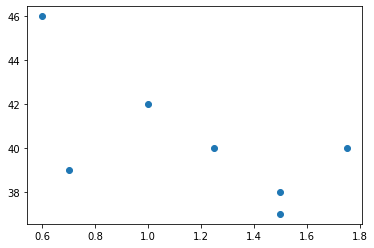

In [17]:
import pandas as pd
from matplotlib import pyplot as plt

%matplotlib inline

dataset = [[0.6,46,'train'],[0.7,39,'test'],[1,42,'train'],[1.25,40,'train'],[1.5,38,'train'],[1.5,37,'test'],[1.75,40,'test']]

df = pd.DataFrame(dataset, columns=["age", "price", "usage"])
plt.scatter(x=df["age"], y=df["price"], marker='o')
plt.show()

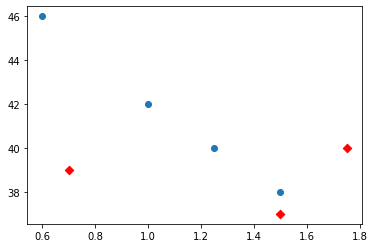

In [18]:
plt.scatter(x=df[df["usage"]=="train"]["age"], y=df[df["usage"]=="train"]["price"], marker='o')
plt.scatter(x=df[df["usage"]=="test"]["age"], y=df[df["usage"]=="test"]["price"], color="r", marker='D')
plt.show()

In [23]:
from sklearn import linear_model
train_X = df[df["usage"]=="train"]["age"].to_numpy()
train_X = train_X.reshape((train_X.shape[0], 1))
train_Y = df[df["usage"]=="train"]["price"].to_numpy()
train_Y = train_Y.reshape((train_Y.shape[0], 1))

test_X = df[df["usage"]=="test"]["age"].to_numpy()
test_X = test_X.reshape((test_X.shape[0], 1))
test_Y = df[df["usage"]=="test"]["price"].to_numpy()
test_Y = test_Y.reshape((test_Y.shape[0], 1))

lr = linear_model.LinearRegression()
lr.fit(train_X, train_Y)
print(lr.coef_, lr.intercept_)

[[-8.88260255]] [51.15983027]


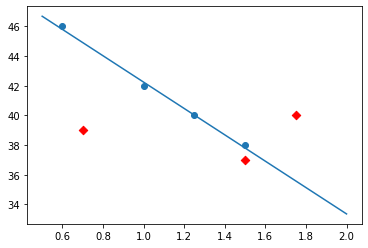

In [24]:
import numpy as np

lx = np.linspace(0.5, 2, 200)
ly = lx * -8.88 + 51.12
plt.scatter(x=train_X[:, 0], y=train_Y[:, 0], marker='o')
plt.scatter(x=test_X[:, 0], y=test_Y[:, 0], color="r", marker='D')
plt.plot(lx, ly)
plt.show()

In [25]:
from sklearn.metrics import mean_squared_error as mse
print(mse(train_Y, lr.predict(train_X)))
print(mse(test_Y, lr.predict(test_X)))

0.03394625176803393
18.410681359103787


模型的参数值过大导致过拟合。如果让模型的参数都相对小一点，往往会产生更好的结果。模型的参数是优化损失函数得到的。线性回归的损失函数是：

$MSE(f) =\frac{1}{n}\cdot\sum_{i=0}^n(y_i - f(x_i))^2 $

岭回归就是在线性回归的损失函数基础上加了一个正则化项：

$New Loss(y,y_pred) = MSE(y, y_pred) + \alpha\cdot\Vert\Theta\Vert_1$

其中$\alpha$是控制正则项与MSE之间的权重，因为这两者的重要性可能是不一样的。